# Week_8 복습과제

# 1. CustomerData로 K-means clustering 실습
### 제품 포트폴리오와 지역의 관계를 알아보자

(* 제품 포트폴리오: 회사가 생산하는 품목군을 나타내는 둘 이상의 제품 그룹)

CustomerData.xls
- Customer ID: 고객 ID로 각 고객을 구분해주는 유니크한 값
- ItemsBought: 팔린 개수 
- ItemsReturned: 환불 발생 개수
- ZipCode: 지역 코드
- Product: 물품 고유 번호

In [65]:
#공통 모듈
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### 1-1. 'CustomerData.xls'를 읽어와 CD에 저장하시오.
- 주어진 데이터의 파일 속성이 excel임을 주의하시오.

In [66]:
df=pd.read_excel('C:\\Users\LG-PC\\Desktop\\ERUON\\Euron data\\CustomerData.xls')

#### 1-2. HR 데이터의 상위 3개의 행과 하위 3개의 행을 통해 데이터가 제대로 불러와 졌는지 확인하시오.

In [67]:
df.head(3)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343


In [68]:
df.tail(3)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
10,16,42,1,1,1547
11,17,46,1,1,1265
12,21,41,22,9,2465


#### 1-3. ItemsBought과 ItemsReturned의 특정 단위를 같게하는 데이터 정규화작업을 진행하시오.
- 데이터분석 시 원본 데이터는 변형하지 않는 것이 좋다. 따라서, 전처리는 원본 데이터를 복사하여 생성한 데이터로 진행하라.(이름은 자유롭게 지정)   
- MinMaxScaler()를 이용해 정규화를 진행한다.
- 정규화 과정에 쓰이는 MinMaxScaler()는 사이킷런의 preprocessing 패키지에 있다.

In [69]:
ct=df

from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

ct.loc[:,['ItemsBought','ItemsReturned']]=minMaxScaler.fit_transform(ct.loc[:,['ItemsBought','ItemsReturned']])


In [70]:
ct.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435


#### 1-4.  위에서 진행한 데이터를 이용하여 K-평균 군집 알고리즘의 훈련과 예측을 한 후 군집 산점도를 그려보아라.
- 빈칸에 답을 입력하시오.
- K = 1 ~ 6 까지를 확인해본다.

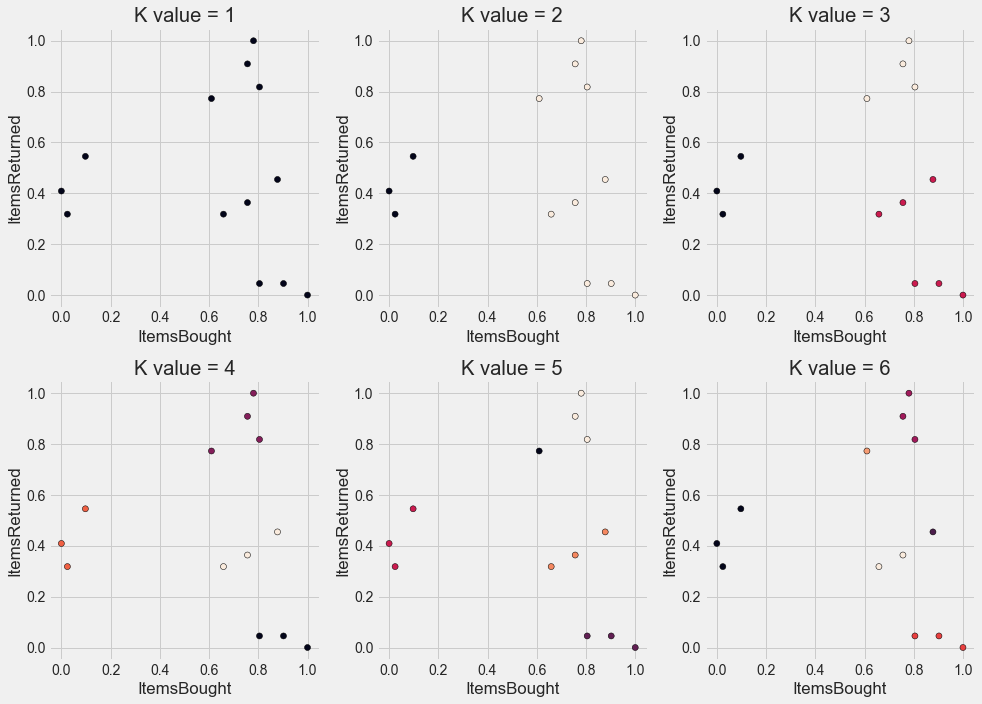

In [71]:
#  군집 산점도
from sklearn.cluster import KMeans
# 화면(figure) 생성
plt.figure(figsize = (14, 10))

X = ct[['ItemsBought', 'ItemsReturned']]

# K 값을 늘려가며 반복 테스트
for i in range(1, 7):
    estimator = KMeans( n_clusters =i, n_init=10)
    ids = estimator.fit_predict(X) #비지도 학습
    plt.subplot(2, 3, i) # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
    plt.tight_layout()

    plt.title("K value = {}".format(i)) # 서브플롯의 라벨링
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    

    # 클러스터링 그리기
    plt.scatter(ct['ItemsBought'], ct['ItemsReturned'], c=ids, edgecolor="black")
                
plt.show()

#### 1-5. 그려본 그래프를 기반으로 의미가 있어보이는 여러가지 k값에 대해 실루엣 다이어그램을 그려보고 군집화를 가장 잘 나타내는 k값을 선택하고, 이유를 설명하시오.
- 아래 코드 실행

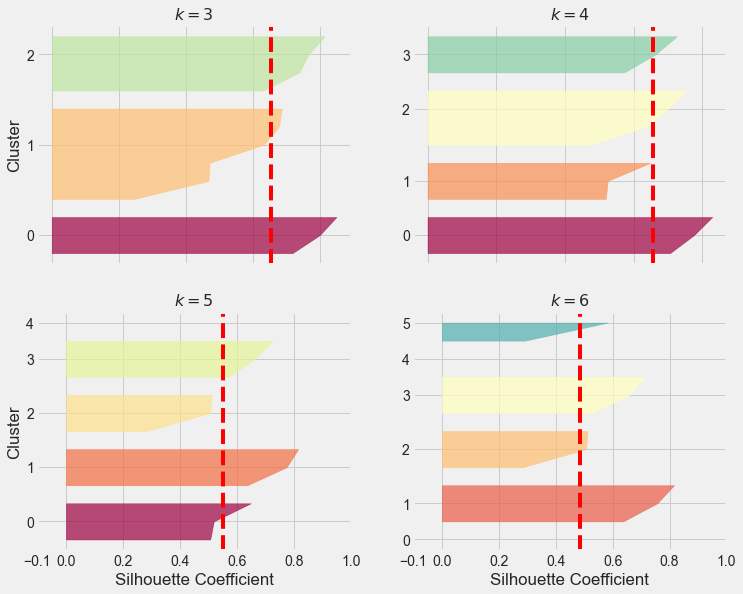

In [72]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

kmeans_per_k = [KMeans(n_clusters=k , n_init=10).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

for k in (3, 4, 5, 6): 
    plt.subplot(2, 2, k - 2)
    
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

답: k=4인 경우가 가장 구분을 세분화하여 군집화하였다. 

#### 1-6. 위에서 답한 k값으로 k개의 그룹에 대한 해석을 적으시오.

답: k=4인 경우
- ItemsBought와 ItemsReturned가 모두 높은 그룹,
- ItemsBought는 매우 높지만, ItemsReturned가 매우 낮을 그룹,
- 직전의 그룹보다 ItemsBought는 유사하거나 조금 작지만, ItemsReturned는 더 높은 그룹,
- ItemsBought는 매우 낮지만, ItemsReturned는 상대적으로 높은 그룹으로 나뉜다. 

#### 1-6. k=3 으로 product id와 그래프를 그려보니 다음과 같다.
- 아래 코드 실행

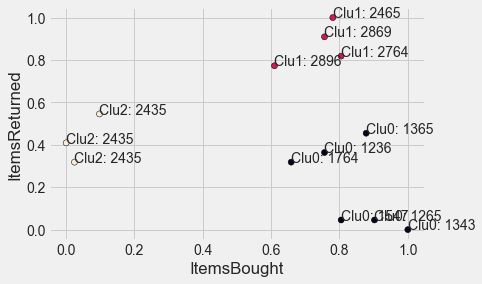

In [73]:
# K = 3으로 클러스터링
estimator = KMeans(n_clusters = 3)

# 클러스터링 생성
cluster_ids = estimator.fit_predict(X)

# create a scatter plot
plt.scatter(ct['ItemsBought'], ct['ItemsReturned'], c=cluster_ids, edgecolor="black")

# 제품과 클러스터 id로 데이터에 범례 달기
for index, c_id, bought, returned, zip_code, product in ct.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

#### 위 그래프에서 문제가 있는 제품을 찾아내고,  그 제품을 구매한 고객 데이터를 군집(cluster_ids)을 이용하여 출력하시오.

답: 2435 제품을 보면 ItemsBought는 가장 낮고 ItmesReturned는 상대적으로 큰 문제가 있다. 

In [ ]:
cluster_ids

#### 1-7. 각 군집과 지역의 관계를 살펴보기 위해 그래프를 그리고 앞에서 장의한 각 군집의 특성을 고려하여 어떤 지역에서 성과가 좋은지 판단하시오.
- 지역으로 우편번호를 이용한다.
- 빈칸에 답을 입력하시오.

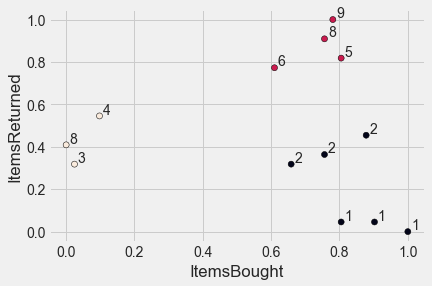

In [76]:
plt.scatter(ct['ItemsBought'], ct['ItemsReturned'], c=cluster_ids, edgecolor="black")

# 우편번호로 범례달기

for index, c_id, bought, returned, zip_code, product in ct.itertuples(): 
    plt.annotate(zip_code,(bought + 0.01, returned + 0.01))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()

답: 지역 1에서 팔린 개수가 많고 환불 개수가 가장 적어 성과가 좋은 것으로 보인다. 

# 2. Supermarket Customer Data를 활용한 DBSCAN 실습
Mall_Customers.csv 데이터

- Customer ID
- Age
- Genre: 고객 성별 (Gender) 
- Annual income (k$) 
- Spending score(1-100) : assigned based on parameters like customer behavior and purchasing data

#### 2-1. 'Mall_Customers.csv' 데이터를 불러와 df에 저장하시오.

In [80]:
df=pd.read_csv('C:\\Users\LG-PC\\Desktop\\ERUON\\Euron data\\Mall_Customers.csv')

#### 2-2. df의 처음 다섯개 행을 확인하시오.

In [81]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2-3. info() 함수를 이용해 데이터프레임의 기본 정보를 확인하시오.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 2-4.describe() 함수를 이용해 df의 정보를 확인하시오.

In [83]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 2-5. 칼럼의 이름을 rename 함수를 활용하여 바꾸시오.

Annual Income (k$) 는 Annual Income 으로, Spending Score(1-100)은 Spending Capability로 바꾸시오. 

바꾼 뒤, head()함수를 활용하여 확인하시오.

In [87]:
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Capability'},inplace=True)

In [88]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Capability
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2-6. 아래의 코드를 돌려서 데이터 분포를 확인하시오.

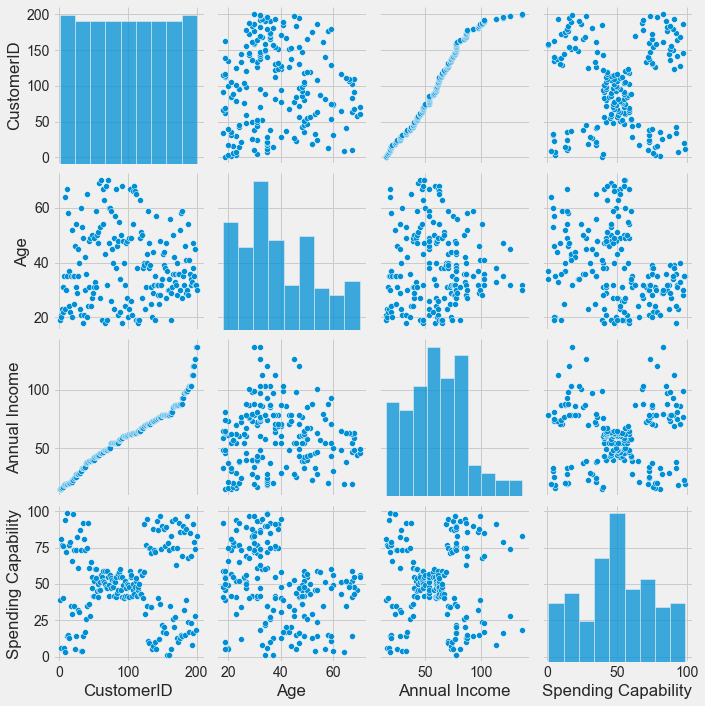

In [89]:
sns.pairplot(df)

#### 2-7. CustomerID 칼럼을 삭제한 뒤 확인하시오.

In [90]:
del df['CustomerID']
df.head()

,Genre,Age,Annual Income,Spending Capability
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### 2-8. iloc()함수를 사용하여 변수 x에 Annual Income 과 Speding Capability를 담으시오.

In [97]:
x=df.iloc[:,[2,3]]
x.head()

,Annual Income,Spending Capability
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### 2-9. 다음의 코드를 돌려, (200,2)가 출력되는지 확인하시오.

In [98]:
x.shape

(200, 2)

#### 2-10. 사이킷런의 DBSCAN을 활용하여 x를 fit하시오.

- eps=3
- min_samples=4
- metric='euclidean'

In [107]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=6, metric='euclidean')
db.fit(x)

DBSCAN(eps=3, min_samples=6)

#### 2-11.labels_을 출력하여 확인하시오.

In [108]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1, -1, -1,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

#### 2-12. cluster의 개수를 계산한 뒤 출력하시오. 하드코딩하지 마시오.

(*힌트: set함수/len함수 이용 , label이 -1인 경우는 제외)

In [109]:
len(set(model.labels_))-1

3

#### 2-13. 다음의 코드를 실행하여 DBSCAN의 결과를 확인하시오.

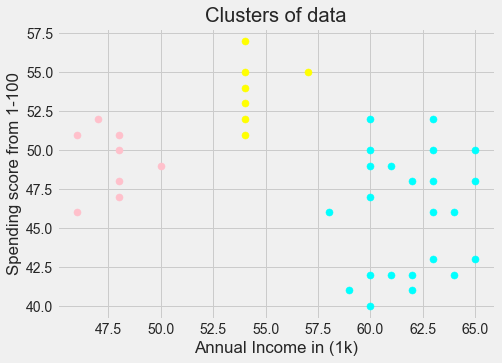

In [125]:
x = np.array(x)
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s= 50, c= 'pink')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s= 50, c= 'yellow')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s= 50, c= 'cyan')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s= 50, c= 'magenta')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s= 50, c= 'orange')
plt.scatter(x[y_means == 5,0], x[y_means == 5,1], s= 50, c= 'blue')
plt.scatter(x[y_means == 6,0], x[y_means == 6,1], s= 50, c= 'red')
plt.scatter(x[y_means == 7,0], x[y_means == 7,1], s= 50, c= 'black')
plt.scatter(x[y_means == 8,0], x[y_means == 8,1], s= 50, c= 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending score from 1-100')
plt.title('Clusters of data')
plt.show()

# 3. 가우시안 혼합 모델 실습

- 올리베티 얼굴 데이터셋: 사람 40명의 얼굴 이미지 데이터 (인당 10장씩) 

In [126]:
#돌려주시면 됩니다!

#데이터셋 불러오기
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#계층적 샘플링으로 데이터 나누기
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\LG-PC\scikit_learn_data


#### 3-1. pca 모듈로 X_train 데이터의 차원을 99% 로 줄여주세요.

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train = pca.fit_transform(X_train)

#### 3-2. AIC 점수를 비교해 사이킷런의 GaussianMixture 모듈의 최적의 클러스터 개수를 찾아보겠습니다.

- n_component를 1부터 100까지 10 간격으로 하여 각 클러스터 개수별 AIC 점수를 구하고 이를 plot(n_components, aics)으로 나타내세요.
- covariance_type='full', random_state=42

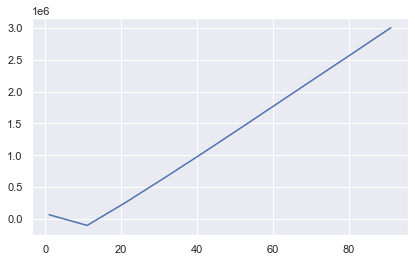

In [136]:
from sklearn.mixture import GaussianMixture

k=np.arange(1,100,10)
gmms = [GaussianMixture(n_components=n,covariance_type='full',random_state=42).fit(X_train) for n in k]
aics = [gmm.aic(X_train) for gmm in gmms]
plt.plot(k,aics,label='AIC')
plt.show()

#### 3-3. 최적 n_component 값을 넣어 gmm을 fit 시키고 알고리즘이 수렴했는지 확인해보세요.

In [138]:
GaussianMixture(n_components=11,covariance_type='full',random_state=42).fit(X_train)

GaussianMixture(n_components=11, random_state=42)

## 보너스. 몇가지 예제 데이터에 대해 위에서 나열한 군집화 방법을 적용한 결과이다. 
#### 같은 색상의 데이터는 같은 군집로 분류된 것이다. 그림에서 보다시피 각 군집화 방법마다 특성이 다르므로 원하는 목적과 데이터 유형에 맞게 사용해야 한다.
- K-평균 군집화(K-means Clustering)

- 디비스캔 군집화(DBSCAN Clustering)

- 유사도 전파 군집화(Affinity Propagation Clustering)

- 계층적 군집화(Hierarchical Clustering)

- 스펙트럴 군집화(Spectral Clustering)

출처: https://datascienceschool.net/03%20machine%20learning/16.01%20%EA%B5%B0%EC%A7%91%ED%99%94.html

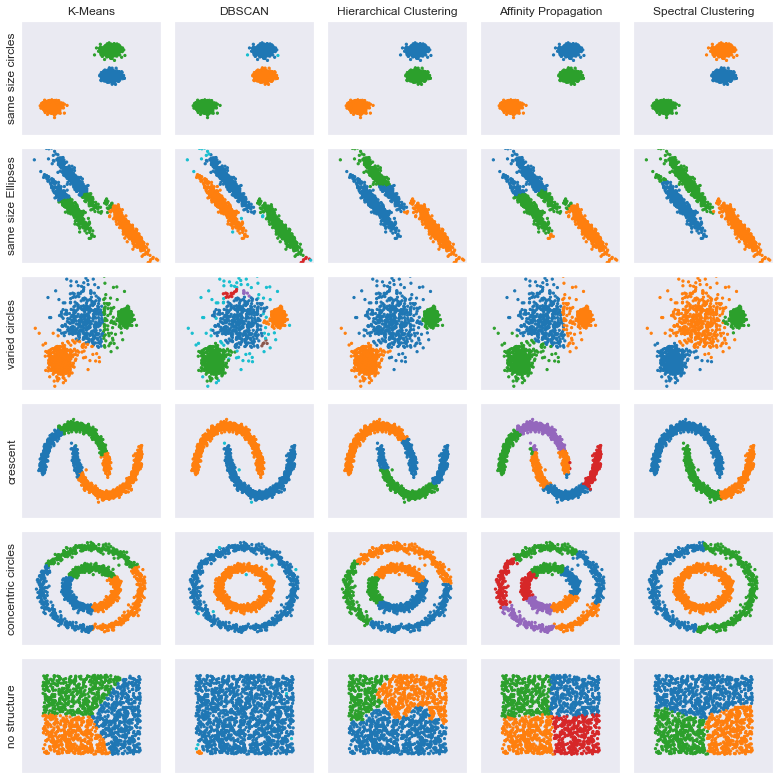

In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings(action="ignore")

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "same size circles": blobs, 
    "same size Ellipses": anisotropic, 
    "varied circles": varied, 
    "crescent": noisy_moons, 
    "concentric circles": noisy_circles, 
    "no structure": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["초승달", "동심원"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()